In [ ]:
%matplotlib inline
import torch
import util as u
import AutoEncoder.variational_autoencoder as vae
from torch.utils.data import DataLoader

LATENT_LENGTH = 60
RANDOM_SEED = 0

for digit in range(10):
    util = u.Util()
    train_data = util.get_sep_indx_data(digit_filter=digit, train=True)
    #print(train_data)
    VAE = vae.VariationalAutoEncoder(latent_len=LATENT_LENGTH, digit=digit, random_seed=RANDOM_SEED)
    VAE.to(VAE.device)
    VAE.fit(train_data, num_epochs=30, lr=0.001, batch_size=128, save_model=True)
    #VAE.load_state_dict(torch.load(f'MNIST_digits_models/VAE_models/{digit}_model_{LATENT_LENGTH}_{RANDOM_SEED}.pth'))
    print(train_data)
    train_loader = DataLoader(
                train_data,
                batch_size=1,
                num_workers=32
            )
    train_loss, train_latent = VAE.test(train_loader)
    VAE.store_latent(train_latent, train=True)
    print(digit, train_loss, len(train_latent))
    test_data = util.get_sep_indx_data(digit_filter=digit, train=False)
    test_loader = DataLoader(
                test_data,
                batch_size=1,
                num_workers=32
            )
    test_loss, latent = VAE.test(test_loader)
    VAE.store_latent(latent, train=False)
    print(digit, test_loss, len(latent))

In [3]:
test_data = util.get_sep_indx_data(digit_filter=digit, train=False)
test_data

Dataset MNIST
    Number of datapoints: 1009
    Root location: dataset
    Split: Test

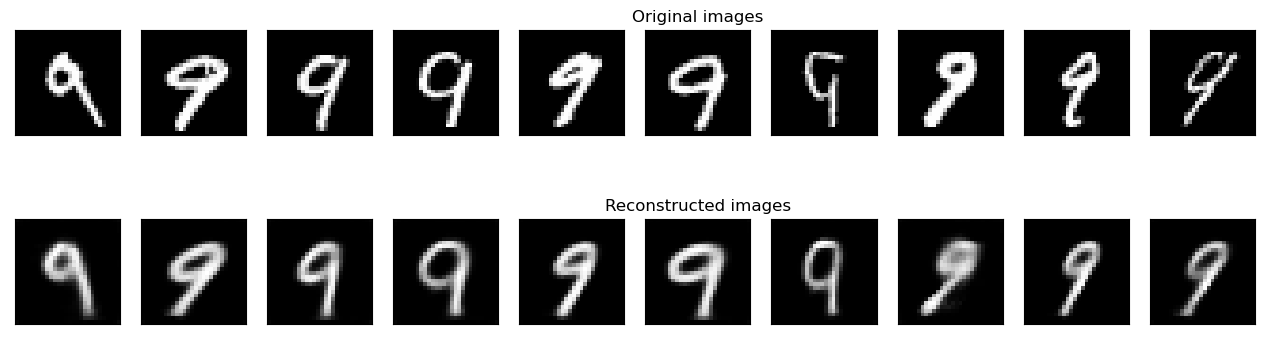

In [6]:
VAE.evaluate(test_data)

In [7]:
import pandas as pd
import os
latent_df = pd.DataFrame()
test_latent_df = pd.DataFrame()
for digit in range(10):
    df = pd.read_csv(f'MNIST_digits_latents/VAE_latents/{digit}_model_{LATENT_LENGTH}_{RANDOM_SEED}_train.csv', header=None)
    df_test = pd.read_csv(f'MNIST_digits_latents/VAE_latents/{digit}_model_{LATENT_LENGTH}_{RANDOM_SEED}_test.csv', header=None)
    df['target'] = int(digit)
    df_test['target'] = int(digit)
    latent_df = pd.concat([latent_df, df])
    test_latent_df = pd.concat([test_latent_df, df_test])

# Shuffle the new MNIST data    
latent_df = latent_df.sample(frac=1).reset_index(drop=True)
test_latent_df = test_latent_df.sample(frac=1).reset_index(drop=True)
x_train, y_train = latent_df[[a for a in range(0,LATENT_LENGTH)]].to_numpy(), latent_df['target'].to_numpy()
x_test, y_test = test_latent_df[[a for a in range(0,LATENT_LENGTH)]].to_numpy(), test_latent_df['target'].to_numpy()
print(x_train.shape)
x_test.shape

(60000, 40)


(10000, 40)

In [8]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
gnb_classifier = GaussianNB().fit(x_train, y_train)
#gnb_classifier.predict(x_train)

In [9]:
gnb_classifier.score(x_test, y_test)

0.1449

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1).fit(x)
for digit in range(10):
    indices = latent_df.index[latent_df.target == digit].tolist()
    lst = [kmeans.labels_[i] for i in indices]
    mode = max(set(lst), key=lst.count)
    #print(lst)
    count = 0
    for i in lst:
        if i != mode:
            count += 1
    print(len(lst), digit, mode, count)

/home/fatemeh.afrasiabi001/.conda/envs/tda-py/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5923 0 5 5216
6742 1 6 5946
5958 2 5 5259
6131 3 1 5455
5842 4 7 5173
5421 5 1 4796
5918 6 7 5224
6265 7 4 5529
5851 8 2 5105
5949 9 0 5216


In [6]:
from sklearn.manifold import TSNE
import plotly.express as px
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(latent_df.drop(['target'],axis=1))
fig = px.scatter(tsne_results, x=0, y=1,
                 color=latent_df.target.astype(str),
                 labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()


In [ ]:
fig.write_image("tsne_plots/fig1.png")

In [4]:
VAE.load_state_dict(torch.load('AECompare/MNIST_digits_models/0_model_2.pth'))

<All keys matched successfully>

In [5]:
test_data = util.get_sep_indx_data(digit_filter=0, train=False)
test_loss, latent = VAE.test(test_data)
VAE.store_latent(latent)


In [7]:
VAE.evaluate(test_data)

NameError: name 'VAE' is not defined